### Задача - найти оптимальное количество закупаемых рестораном акульих плавников при стратегиях максимизации прибыли и минимизации риска. Закупка по стоимости cost, цена блюда sale_in_restourant, цена продажи избытка плавников сторонней фирме sale_to_firm. Спрос задается случайно в рамках закона нормального распределения с матожиданием 60.

## Общая часть
#### В первом блоке произведен импорт библиотек, заданы значения стоимости закупки плавников, цена их продажи в ресторане и местной фирме, заданы параметры рандомизации, смоделирован спрос по закону нормального распределения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics # библиотека импортирована для нахождения моды

cost = 7.5 
sale_in_restourant = 12
sale_to_firm = 6

np.random.seed(42)
n = 50000

demand = np.random.normal(loc = 60, scale = 10, size = n)

### Произведена визуализация спроса на гистограмме

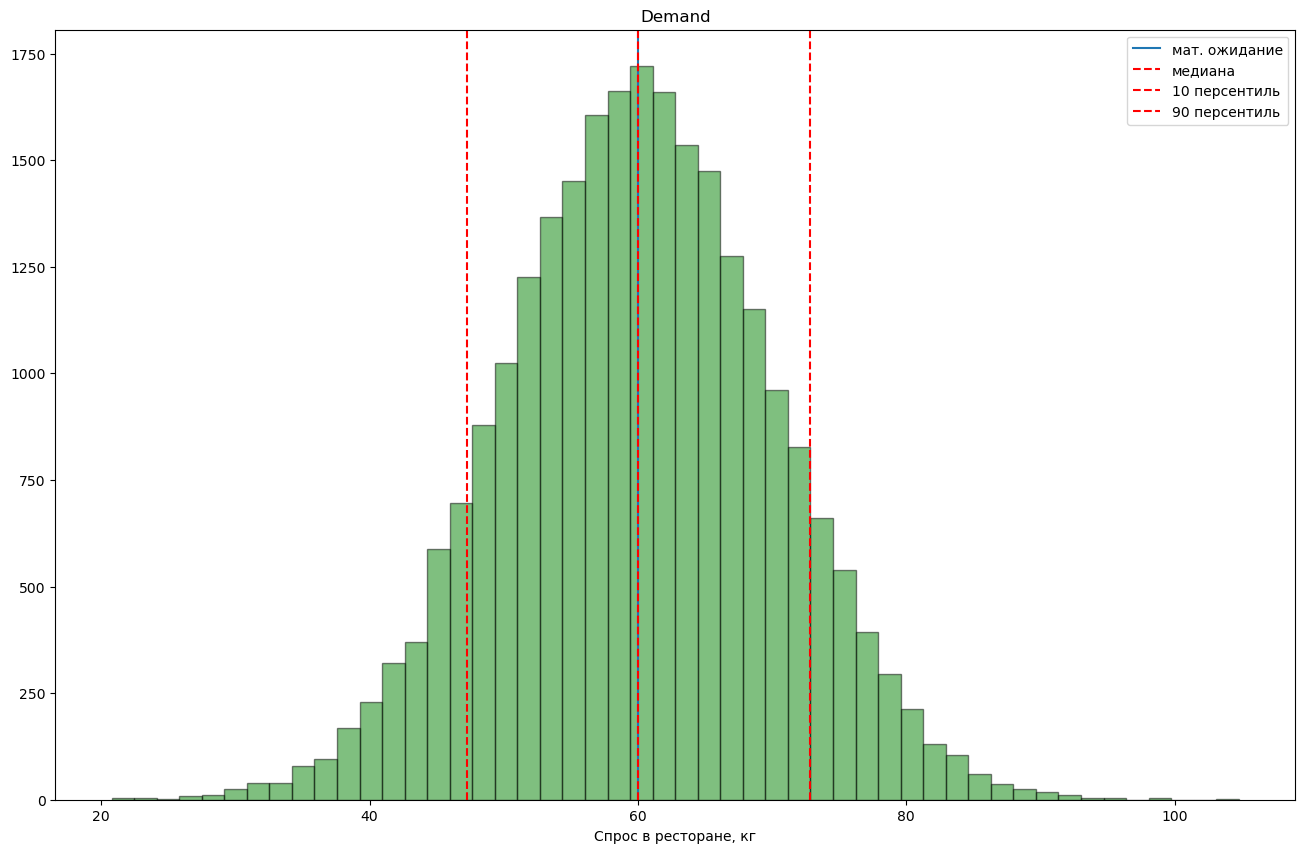

In [2]:
demand_dict = {'mean': np.mean(demand), 'median': np.median(demand), 'p10': np.percentile(demand, 10), 'p90': np.percentile(demand, 90)}
fig, ax = plt.subplots(figsize = (16, 10))
ax.hist(demand, bins = 50, color = 'green', edgecolor = 'black', alpha = 0.5)
ax.set_xlabel('Спрос в ресторане, кг')
plt.axvline(x = demand_dict['mean'], label = 'мат. ожидание')
plt.axvline(x = demand_dict['median'], label = 'медиана', color = 'red', linestyle = 'dashed')
plt.axvline(x = demand_dict['p10'], label = '10 персентиль', color = 'red', linestyle = 'dashed')
plt.axvline(x = demand_dict['p90'], label = '90 персентиль', color = 'red', linestyle = 'dashed')
plt.legend()
plt.title('Demand');

## Стратегия по минимизации рисков
#### Для выбора стратегии принято решение рассмотреть средние потери от избыточной закупки, то есть от закупки, при которой часть плавников продается на ферму. В таком случае оптимальным выбором будет максимально возможная закупка плавников с минимальной потерей от продажи на ферму. Рассчитаны возможные потери денежных средств в случае продажи на ферму, если на ферму плавники не продавались, то потери считались равными нулю. 
#### Ежедневные потери менее 1 доллара от продажи плавников на ферму возможны при закупке до 48 кг плавников включительно, потери менее 1 цента - при закупке не более 31 кг включительно. Таким образом, при рассмотренных условиях оптимальной стратегией минимизации рисков может быть закупка 48 кг либо 31 кг плавников в зависимости от желаемых ограничений. В пункте 3 будет рассмотрена стратегия потери не более 1 цента - закупка 31 кг.

In [3]:
# создание пустого списка для средний значений потерь
mean_all_losses = []
# рассмотрение разных вариантов объемов закупки
for volume in range(71):
    demand = np.random.normal(loc = 60, scale = 10, size = n) # моделирование случайного спроса на каждый случай отдельно
    # создание массива, заполненного объемом закупки для последущей операции с векторами
    volume_arr = np.linspace(volume, volume, n) 
    # использование лямбда-функции для операции с векторами 
    # с учетом заданных ограничений
    losses = np.array(list(map(lambda x, y: 0 if  x <= y else - (x - y) * (sale_to_firm - cost), volume_arr, demand)))
    # заполнение списка средними значениями потерь для разных объемов закупки
    mean_all_losses.append(np.mean(losses)) 

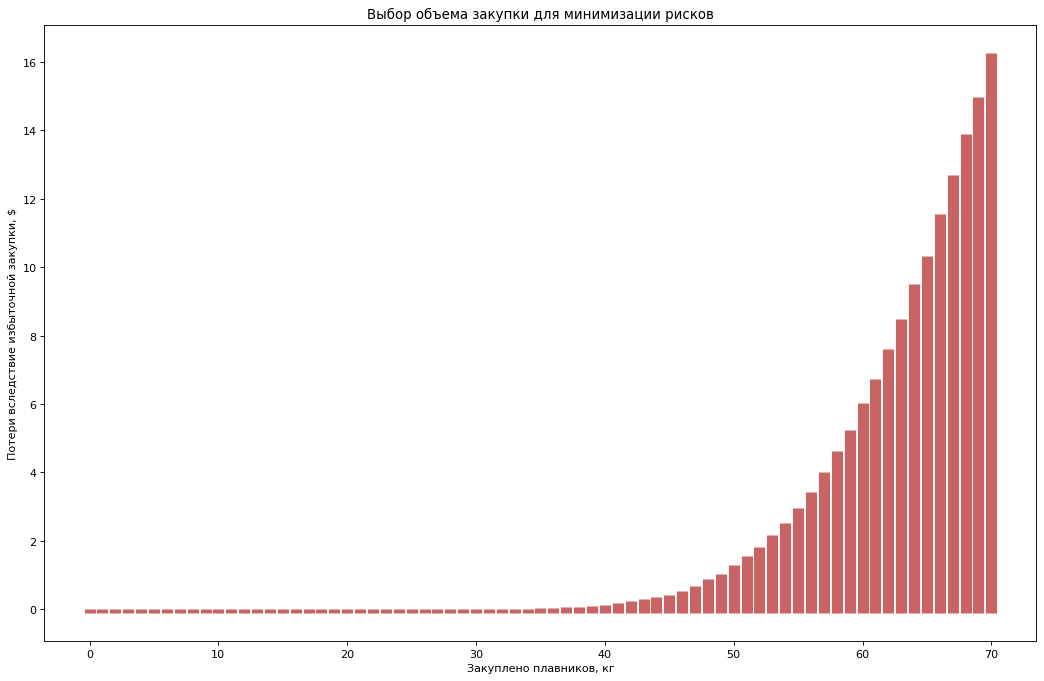

In [4]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.set_xlabel('Закуплено плавников, кг')
ax.set_ylabel('Потери вследствие избыточной закупки, $')
ax.vlines(x=range(71), ymin=-0.1, ymax=mean_all_losses,  color='firebrick', alpha=0.7, linewidth=10)
plt.title('Выбор объема закупки для минимизации рисков');

## Стратегия максимизации прибыли
#### Для разных объемов закупок плавников рассчитаны средние значения прибыли, произведена визуализация результатов. Самое большое значение средней прибыли получено при закупке 67 кг плавников.

In [5]:
# создание пустого списка для средних значений прибыли
mean_all_profits = []
for volume in range(40, 81):
    demand = np.random.normal(loc = 60, scale = 10, size = n)
    volume_arr = np.linspace(volume, volume, n)
    # использование лямбда-функции для операции с векторами 
    # с учетом условия необходимости реализации избытка плавников на ферму
    profit = np.array(list(map(lambda x, y: y * (sale_in_restourant - cost) + (sale_to_firm - cost)
                               * (x - y) if  x > y else x * (sale_in_restourant - cost), volume_arr, demand)))
    # заполение списка средними значениями прибыли для разных объемов закупки
    mean_all_profits.append(np.mean(profit)) 

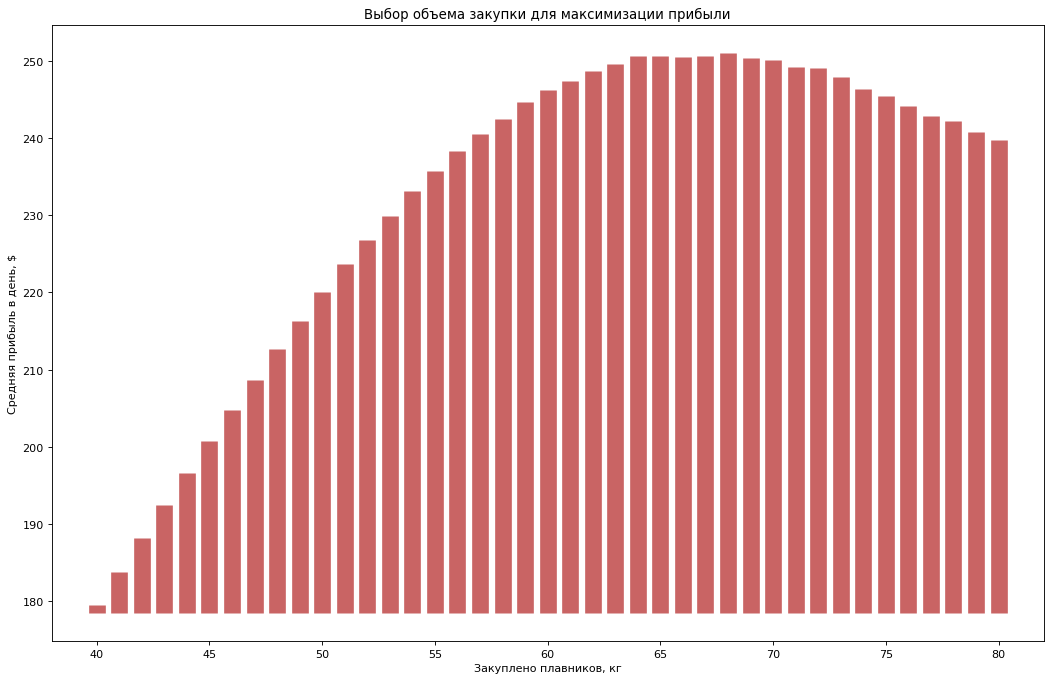

In [6]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.set_xlabel('Закуплено плавников, кг')
ax.set_ylabel('Средняя прибыль в день, $')
ax.vlines(x=range(40, 81), ymin=min(mean_all_profits) - 1, ymax=mean_all_profits,  color='firebrick', alpha=0.7, linewidth=15)
plt.title('Выбор объема закупки для максимизации прибыли');

## Мода, медиана, средняя, 10 и 90 перцентиль выбранной стратегии

### Стратегия минимизации рисков

#### Рассчитаны мода, медиана, средняя, 10 и 90 перцентиль для объема закупок 31 кг. Произведена их визуализация.
#### Ежедневная прибыль будет составлять 139,5 доллара, ежедневные отклонения от данного значения стремятся к нулю. 

In [7]:
volume = 31
volume_arr = np.linspace(volume, volume, n)
profit = np.array(list(map(lambda x, y: y * (sale_in_restourant - cost) + (sale_to_firm - cost) * (x - y) 
                           if  x > y else x * (sale_in_restourant - cost), volume_arr, demand)))

Мода:  139.5 
Средняя:  139.46227859000155 
Медиана:  139.5 
10 перцентиль:  139.5 
90 перцентиль:  139.5


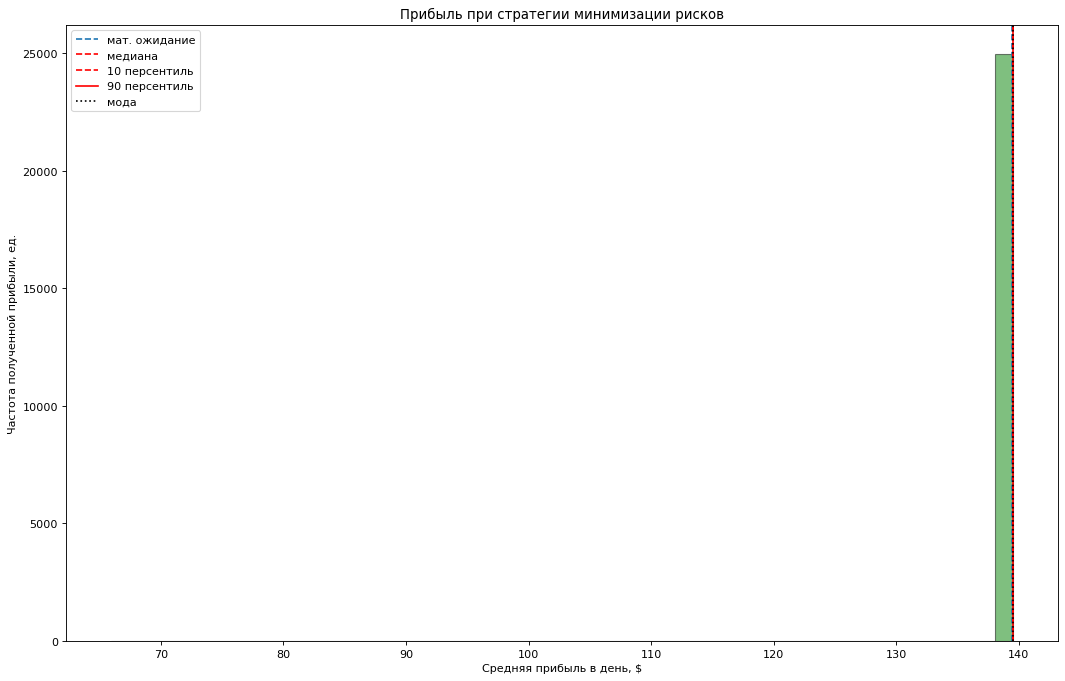

In [8]:
print('Мода: ', statistics.mode(profit), '\nСредняя: ', np.mean(profit), '\nМедиана: ', np.median(profit), '\n10 перцентиль: ', 
      np.percentile(profit, 10), '\n90 перцентиль: ', np.percentile(profit, 90))
profit_dict = {'mean': np.mean(profit), 'median': np.median(profit), 'mode': statistics.mode(profit), 
               'p10': np.percentile(profit, 10), 'p90': np.percentile(profit, 90)}
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
plt.hist(profit, bins = 50, color = 'green', edgecolor = 'black', alpha = 0.5)
ax.set_xlabel('Средняя прибыль в день, $')
ax.set_ylabel('Частота полученной прибыли, ед.')
plt.axvline(x = profit_dict['mean'], label = 'мат. ожидание', linestyle = 'dashed')
plt.axvline(x = profit_dict['median'], label = 'медиана', color = 'red', linestyle = 'dashed')
plt.axvline(x = profit_dict['p10'], label = '10 персентиль', color = 'red', linestyle = 'dashed')
plt.axvline(x = profit_dict['p90'], label = '90 персентиль', color = 'red')
plt.axvline(x = profit_dict['mode'], label = 'мода', color = 'black', linestyle = 'dotted')
plt.legend()
plt.title('Прибыль при стратегии минимизации рисков');

### Стратегия максимизации прибыли
#### Рассчитаны мода, медиана, средняя, 10 и 90 перцентиль для объема закупок 67 кг. Произведена визуализация результатов.

In [9]:
volume = 67
volume_arr = np.linspace(volume, volume, n)
profit = np.array(list(map(lambda x, y: y * (sale_in_restourant - cost) + (sale_to_firm - cost) * (x - y) 
                           if  x > y else x * (sale_in_restourant - cost), volume_arr, demand)))

Мода:  301.5 
Средняя:  251.11560636261947 
Медиана:  259.91366910617046 
10 перцентиль:  182.07212403432592 
90 перцентиль:  301.5


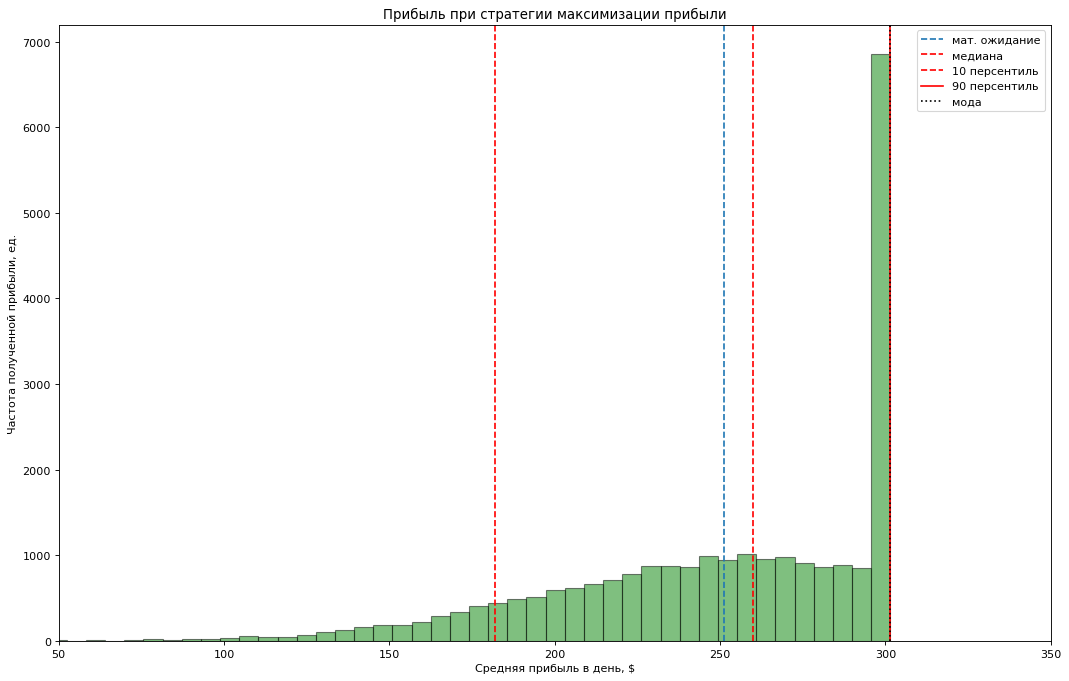

In [10]:
print('Мода: ', statistics.mode(profit), '\nСредняя: ', np.mean(profit), '\nМедиана: ', np.median(profit), '\n10 перцентиль: ', 
      np.percentile(profit, 10), '\n90 перцентиль: ', np.percentile(profit, 90))
profit_dict = {'mean': np.mean(profit), 'median': np.median(profit), 'mode': statistics.mode(profit), 
               'p10': np.percentile(profit, 10), 'p90': np.percentile(profit, 90)}
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
plt.hist(profit, bins = 50, color = 'green', edgecolor = 'black', alpha = 0.5)
ax.set_xlabel('Средняя прибыль в день, $')
ax.set_ylabel('Частота полученной прибыли, ед.')
plt.xlim(50, 350)
plt.axvline(x = profit_dict['mean'], label = 'мат. ожидание', linestyle = 'dashed')
plt.axvline(x = profit_dict['median'], label = 'медиана', color = 'red', linestyle = 'dashed')
plt.axvline(x = profit_dict['p10'], label = '10 персентиль', color = 'red', linestyle = 'dashed')
plt.axvline(x = profit_dict['p90'], label = '90 персентиль', color = 'red')
plt.axvline(x = profit_dict['mode'], label = 'мода', color = 'black', linestyle = 'dotted')
plt.legend()
plt.title('Прибыль при стратегии максимизации прибыли');